<h1>Conceitos</h1>

<h3>Principal component analysis e Singular value decomposition</h3>

Para reduzir o número de dimensões e representar os dados num plano, minimizando a perca de informações, é possível utilizar a classe **PCA** do sklearn **(principal component analysis)**.

Essa classe irá utilizar o métoado de fatoração de matrizes **SVD (singular value decomposition)**, que ocorre na forma:

$\large A_{[m \ \text{x} \ n]} = U_{[m \ \text{x} \ r]} \ \sum_{[r \ \text{x} \ r]} \ (V_{[n \ \text{x} \ r]})^*$

Onde $A$ é a matriz a ser decomposta, $U$ (vetores singulares esquerdos) e $V$ (vetores singulares direitos) são matrizes ortonormais e $\sum$ (vetores singulares) é uma matriz diagonal de valores positivos e não nulos.

No contexto de análise de dados, onde as **colunas das bases de dados representam diferentes características** e suas **linhas representam diferentes entradas**, é possível interpretar essas matrizes da seguinte maneira:

- $U$ representaria uma matriz de similaridade entre as entradas de dados e os novos "conceitos" (agrupamento de características)
- $\sum$ representaria uma matriz onde cada valor representa a força de cada um dos conceitos definidos em $U$
- $V$ representaria uma matriz de similaridade entre as características e os novos conceitos

<h3>T-Stochastic Neighbor Embedding</h3>

O TSNE é um algoritmo que tem como objetivo reduzir as dimensões de um conjunto de dados. 

Ele faz isso transformando as distâncias eucliandianas de dois pontos de alta dimensionalidade $x_i$ e $x_j$ em uma probabilidade condicional $p_{ij}$, considerando que os pontos vizinhos são escolhidos em proporção à sua densidade de probabilidade sobre uma curva Gaussiana centrada em $x_i$ e com variância $\sigma_i²$.

$\large p_{ij} = \frac{exp(-||x_i - x_j||²/2\sigma_i²)}{\sum_{k \ne i} exp(-||x_i - x_k||²/2\sigma_i²)}$

De maneira similar, ele transforma as distâncias euclidianas de dois ponts de baixa dimensionalidade $y_i$ e $y_j$ (contrapartes de $x_i$ e $x_j$) em probabilidades $q_{ij}$ utilizando uma distribuição-t de Student com um único grau de liberdade

$\large q_{ij} = \frac{exp(-||y_i - y_j||²)}{\sum_{k \ne i} exp(-||x_i - x_k||²)}$

O algoritmo então tem como busca minimizar a seguinte função de custo $C$ em cada iteração:

$\large C = \sum_i \sum_j p_{ij} log \frac{p_{ij}}{q_{ij}}$

<h1>Aplicação</h1>

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando a base de dados
base = pd.read_csv(r'exames-tratado-5.csv', index_col=0)
base.head()

,id,diagnostico,exame_2,exame_5,exame_7,exame_8,exame_9,exame_12,exame_14,exame_15,exame_16,exame_18,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31
0,842302,M,10.38,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.006399,0.05373,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,842517,M,17.77,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.005225,0.01860,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,84300903,M,21.25,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.006150,0.03832,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,84348301,M,20.38,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.009110,0.05661,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,84358402,M,14.34,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.011490,0.05688,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [3]:
# Dividindo dados em input e output
x = base.loc[:, 'exame_2':]
y = base['diagnostico']

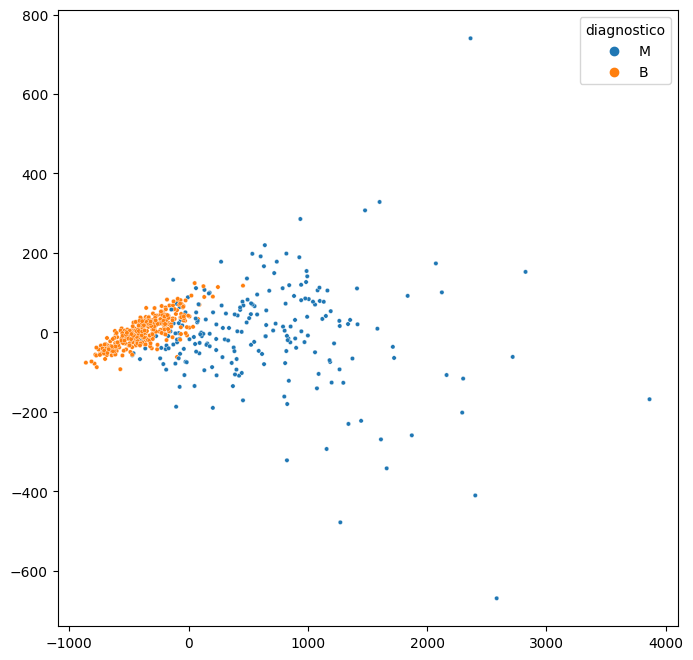

In [12]:
# Utilizando pca para reduzir as dimensões
pca = PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)

plt.figure(figsize=(8,8))
sns.scatterplot(x=x_pca[:, 0], y = x_pca[:, 1], hue=y, s=10)
plt.show()

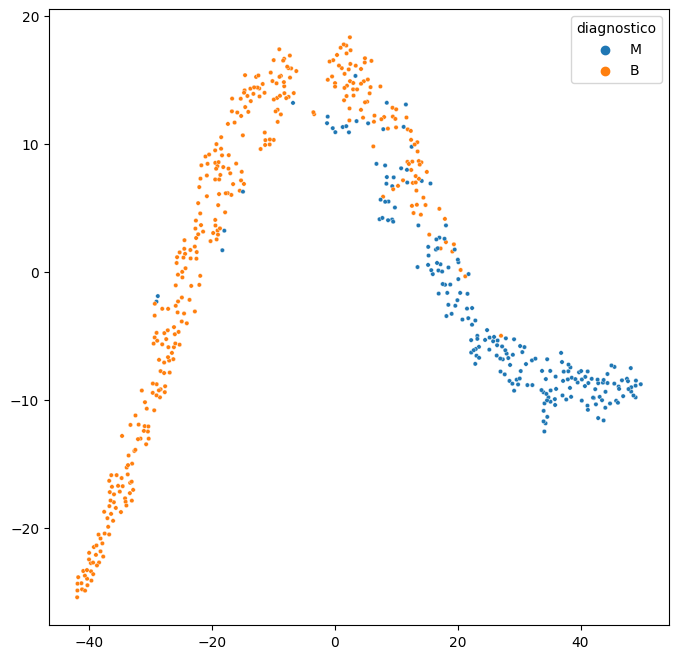

In [19]:
# Utilizando TSNE para reduzir as dimensões
tsne = TSNE(n_components = 2)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8,8))
sns.scatterplot(x=x_tsne[:, 0], y = x_tsne[:, 1], hue=y, s=10)
plt.show()